# LOADING THE DATA

In [11]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the temperature data
temperature_df = pd.read_csv('temperature (1).csv')
binsize_df = pd.read_csv('BinSize (1).csv')

In [13]:
# To know the data type of each column
d1=temperature_df.dtypes
print(d1)
d2=binsize_df.dtypes
print(d2)

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object
ID            object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
STATE         object
NAME          object
GSNFLAG       object
HCNFLAG       object
WMOID        float64
x            float64
y            float64
x_group       object
y_group       object
xy_group      object
hash          object
dtype: object


In [14]:
# Display the first few rows to understand the structure
print(temperature_df.head())
print(binsize_df.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
            ID  LATITUDE  LONGITUDE  ELEVATION STATE                 NAME  \
0  AE000041196    25.333     55.517       34.0   NaN  SHARJAH INTER. AIRP   
1  AEM00041194    25.255     55.364       10.4   NaN           DUBAI INTL   
2  AEM00041217    24.433     54.651       26.8   NaN       ABU DHABI INTL   
3  AEM00041218    24.262     55.609      264.9   NaN          AL AIN INTL   
4  AFM00040990    31.500     65.850     1010.0   NaN     KANDAHAR AIRPORT   

  GSNFLAG HCNFLAG    WMOID             x             y  \
0     GSN     NaN  41196.0  5.579578e+06  2.816905e+06   
1     NaN     NaN  41194.0  5.567782e+06  2.808232e+06   
2     NaN     NaN  41217.0  5.532707e+06  2.716829e+06   
3     NaN     NaN  4121

# DATA PRE-PROCESSING

In [17]:
# Converting the `Date` column from a string format into a `datetime` format
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
# Extracting the year and month from the date
temperature_df['year'] = temperature_df['Date'].dt.year
temperature_df['month_day'] = temperature_df['Date'].dt.strftime('%m-%d')

# Filter for years 2005-2014
data_2005_2014 = temperature_df[(temperature_df['year'] >= 2005) & (temperature_df['year'] <= 2014)]


In [20]:
# Calculating record highs and lows:
record_highs = data_2005_2014[data_2005_2014['Element'] == 'TMAX'].groupby('month_day')['Data_Value'].max()
record_lows = data_2005_2014[data_2005_2014['Element'] == 'TMIN'].groupby('month_day')['Data_Value'].min()


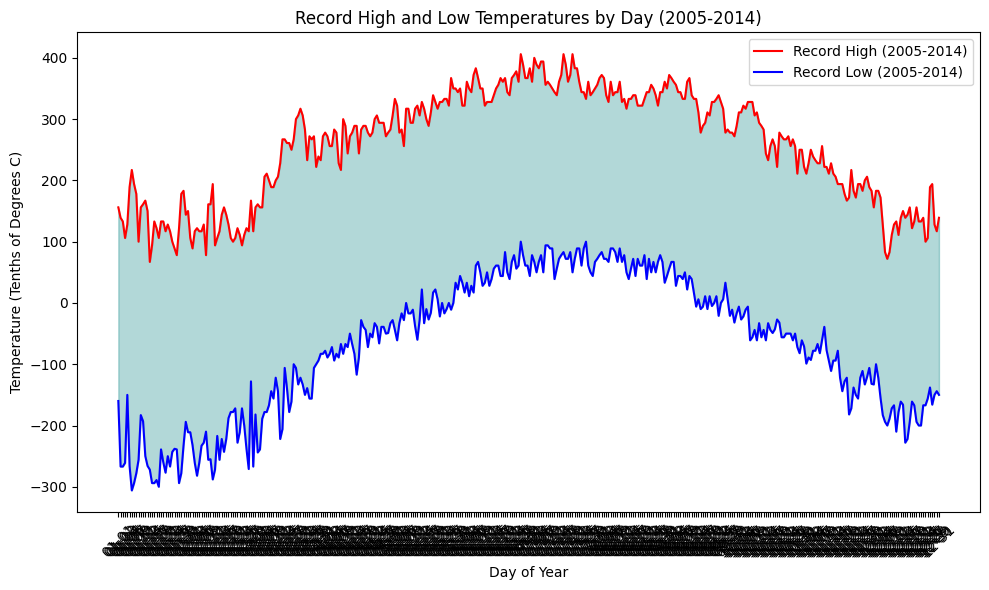

In [28]:
# Initializes a new figure for plotting with dimensions
plt.figure(figsize=(10, 6))

# Plot the record highs and lows
plt.plot(record_highs.index, record_highs.values, label='Record High (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Low (2005-2014)', color='blue')

# Shade the area between the highs and lows
plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='teal', alpha=0.3)

# Labelling of x and y-axis
plt.xlabel('Day of Year')
plt.ylabel('Temperature (Tenths of Degrees C)')

# Title of the figure
plt.title('Record High and Low Temperatures by Day (2005-2014)')

# To display legend (helps identify different elements of the plot)
plt.legend()

# Rotates the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusts the layout to prevent overlapping of elements
plt.tight_layout()
plt.show()


The area between these two lines is shaded to represent the range of temperature variability.

<ipython-input-39-81c203e28bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['month_day'] = data_2015['Date'].dt.strftime('%m-%d')


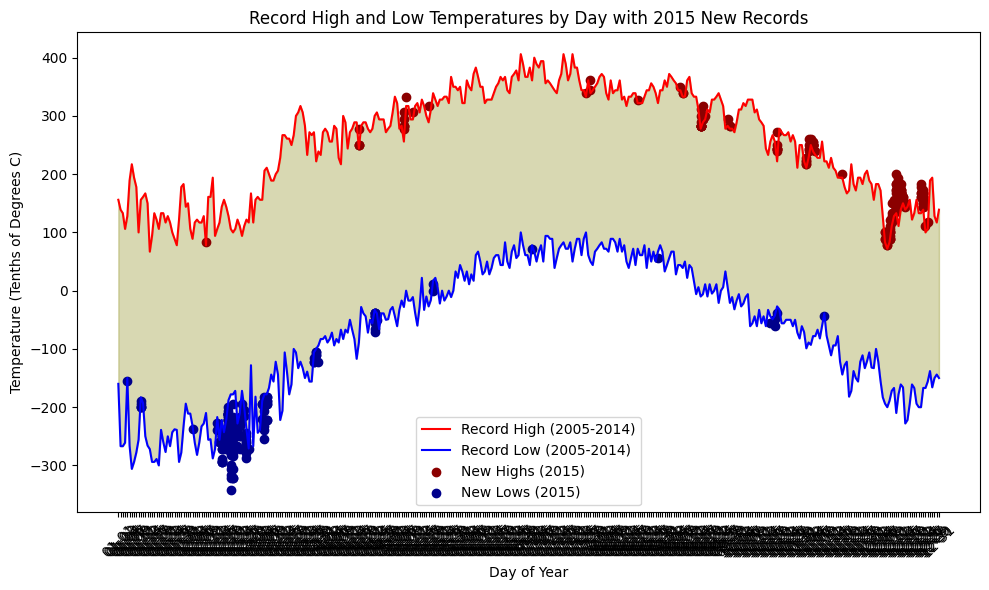

In [39]:
# Prepare 2015 data
data_2015['month_day'] = data_2015['Date'].dt.strftime('%m-%d')

# Find new record-breaking highs and lows for 2015
new_highs_2015 = data_2015[(data_2015['Element'] == 'TMAX') & (data_2015['Data_Value'] > record_highs.reindex(data_2015['month_day']).values)]
new_lows_2015 = data_2015[(data_2015['Element'] == 'TMIN') & (data_2015['Data_Value'] < record_lows.reindex(data_2015['month_day']).values)]

plt.figure(figsize=(10, 6))

# Plot the record highs and lows
plt.plot(record_highs.index, record_highs.values, label='Record High (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Low (2005-2014)', color='blue')

# Shade the area between the highs and lows
plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='olive', alpha=0.3)

# Overlay scatter plot for new records
plt.scatter(new_highs_2015['month_day'], new_highs_2015['Data_Value'], label='New Highs (2015)', color='darkred')
plt.scatter(new_lows_2015['month_day'], new_lows_2015['Data_Value'], label='New Lows (2015)', color='darkblue')

plt.xlabel('Day of Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Record High and Low Temperatures by Day with 2015 New Records')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# Remove leap day (Feb 29)
data_2005_2014 = data_2005_2014[data_2005_2014['month_day'] != '02-29']
data_2015 = data_2015[data_2015['month_day'] != '02-29']


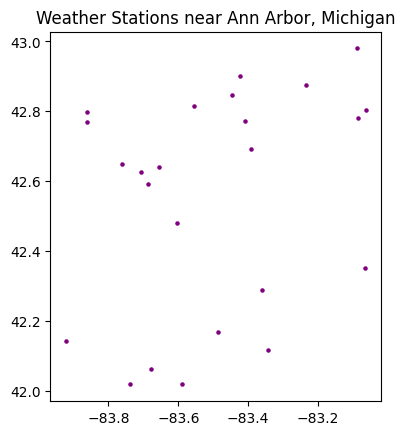

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have latitude and longitude data in `temperature_df` or `BinSize.csv`
# You can create a GeoDataFrame and plot it

# Example: Mocking the stations data
stations_df = pd.DataFrame({
    'id': temperature_df['ID'].unique(),
    'latitude': np.random.uniform(42, 43, size=temperature_df['ID'].nunique()),
    'longitude': np.random.uniform(-84, -83, size=temperature_df['ID'].nunique())
})

gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df.longitude, stations_df.latitude))

# Plot the map
gdf.plot(marker='o', color='purple', markersize=5)
plt.title('Weather Stations near Ann Arbor, Michigan')
plt.show()


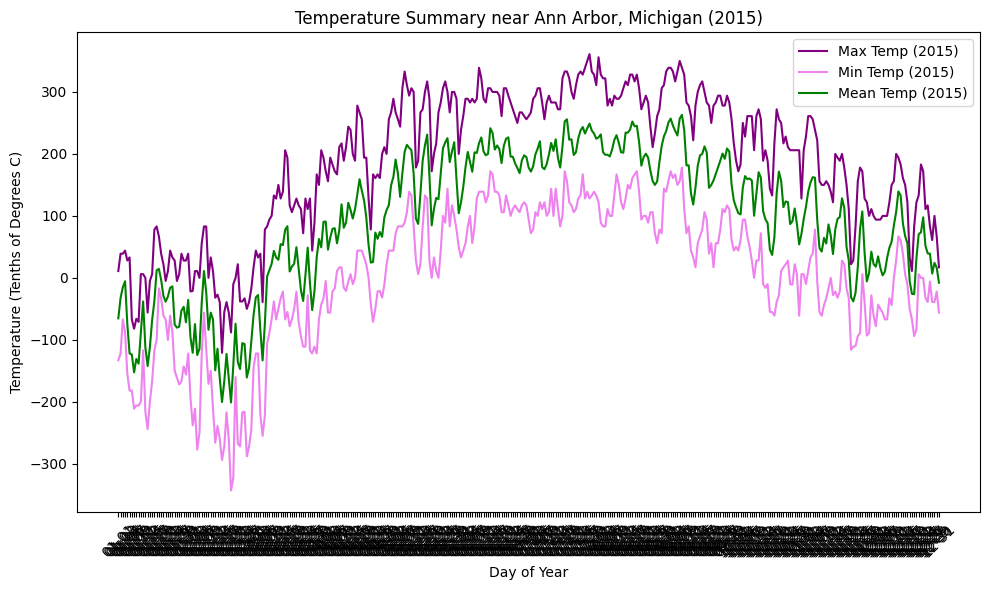

In [49]:
# Group and plot summary stats
summary_2015 = data_2015.groupby('month_day')['Data_Value'].agg(['max', 'min', 'mean'])

plt.figure(figsize=(10, 6))
plt.plot(summary_2015.index, summary_2015['max'], label='Max Temp (2015)', color='purple')
plt.plot(summary_2015.index, summary_2015['min'], label='Min Temp (2015)', color='violet')
plt.plot(summary_2015.index, summary_2015['mean'], label='Mean Temp (2015)', color='green')

plt.xlabel('Day of Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary near Ann Arbor, Michigan (2015)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
